# AutoFortune: Predicting Automobile Prices

# Loading the dataset

In [1]:
import pandas as pd
df=pd.read_csv("C:\\Users\\Madhu\\Downloads\\Automobile_data.csv")

In [2]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


# Handling missing values

In [3]:
df_temp = df[df['normalized-losses']!='?']
normalised_mean = df_temp['normalized-losses'].astype(int).mean()
df['normalized-losses'] = df['normalized-losses'].replace('?',normalised_mean).astype(int)

df_temp = df[df['price']!='?']
normalised_mean = df_temp['price'].astype(int).mean()
df['price'] = df['price'].replace('?',normalised_mean).astype(int)

df_temp = df[df['horsepower']!='?']
normalised_mean = df_temp['horsepower'].astype(int).mean()
df['horsepower'] = df['horsepower'].replace('?',normalised_mean).astype(int)

df_temp = df[df['peak-rpm']!='?']
normalised_mean = df_temp['peak-rpm'].astype(int).mean()
df['peak-rpm'] = df['peak-rpm'].replace('?',normalised_mean).astype(int)

df_temp = df[df['bore']!='?']
normalised_mean = df_temp['bore'].astype(float).mean()
df['bore'] = df['bore'].replace('?',normalised_mean).astype(float)

df_temp = df[df['stroke']!='?']
normalised_mean = df_temp['stroke'].astype(float).mean()
df['stroke'] = df['stroke'].replace('?',normalised_mean).astype(float)


df['num-of-doors'] = df['num-of-doors'].replace('?','four')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


#  Descriptive analysis and Univariate anlysis

In [47]:
df.shape

(205, 26)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    int32  
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [49]:
df.value_counts('make')

make
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
dtype: int64

In [51]:
df['price'].mean()

13207.126829268293

In [52]:
df['price'].median()

10595.0

In [53]:
df.mode()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.0,122.0,toyota,gas,std,four,sedan,fwd,front,94.5,...,92,mpfi,3.62,3.4,9.0,68.0,5500.0,31.0,25.0,13207.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
df['price'].var()

61917513.17991392

In [59]:
df['highway-mpg'].std()

6.88644313094182

In [60]:
df.skew()

C:\Users\Madhu\AppData\Local\Temp\ipykernel_23324\1665899112.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


symboling            0.211072
normalized-losses    0.854802
wheel-base           1.050214
length               0.155954
width                0.904003
height               0.063123
curb-weight          0.681398
engine-size          1.947655
bore                 0.020211
stroke              -0.689784
compression-ratio    2.610862
horsepower           1.397954
peak-rpm             0.073614
city-mpg             0.663704
highway-mpg          0.539997
price                1.827325
dtype: float64

In [61]:
df.kurt()

C:\Users\Madhu\AppData\Local\Temp\ipykernel_23324\1257127604.py:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.kurt()


symboling           -0.676271
normalized-losses    1.404644
wheel-base           1.017039
length              -0.082895
width                0.702764
height              -0.443812
curb-weight         -0.042854
engine-size          5.305682
bore                -0.785040
stroke               2.174471
compression-ratio    5.233054
horsepower           2.678538
peak-rpm             0.086773
city-mpg             0.578648
highway-mpg          0.440070
price                3.354218
dtype: float64

In [62]:
df.sem()

C:\Users\Madhu\AppData\Local\Temp\ipykernel_23324\1459226325.py:1: FutureWarning: The default value of numeric_only in DataFrame.sem is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.sem()


symboling              0.086976
normalized-losses      2.212698
wheel-base             0.420579
length                 0.861674
width                  0.149828
height                 0.170663
curb-weight           36.365883
engine-size            2.908452
bore                   0.018917
stroke                 0.021903
compression-ratio      0.277419
horsepower             2.760142
peak-rpm              33.313665
city-mpg               0.456923
highway-mpg            0.480970
price                549.578611
dtype: float64

In [63]:
df.mad()

C:\Users\Madhu\AppData\Local\Temp\ipykernel_23324\3844944795.py:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  df.mad()


symboling               1.021868
normalized-losses      23.297561
wheel-base              4.662177
length                  9.594322
width                   1.678253
height                  2.015005
curb-weight           428.267983
engine-size            30.223914
bore                    0.231162
stroke                  0.227253
compression-ratio       2.327871
horsepower             30.209304
peak-rpm              382.067817
city-mpg                5.215467
highway-mpg             5.467127
price                5727.215753
dtype: float64

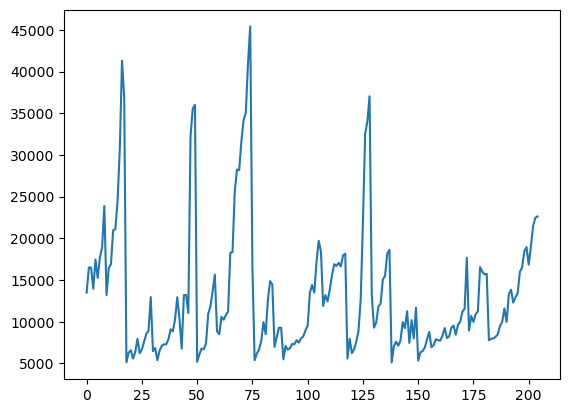

In [72]:
plt.plot(df['price'])

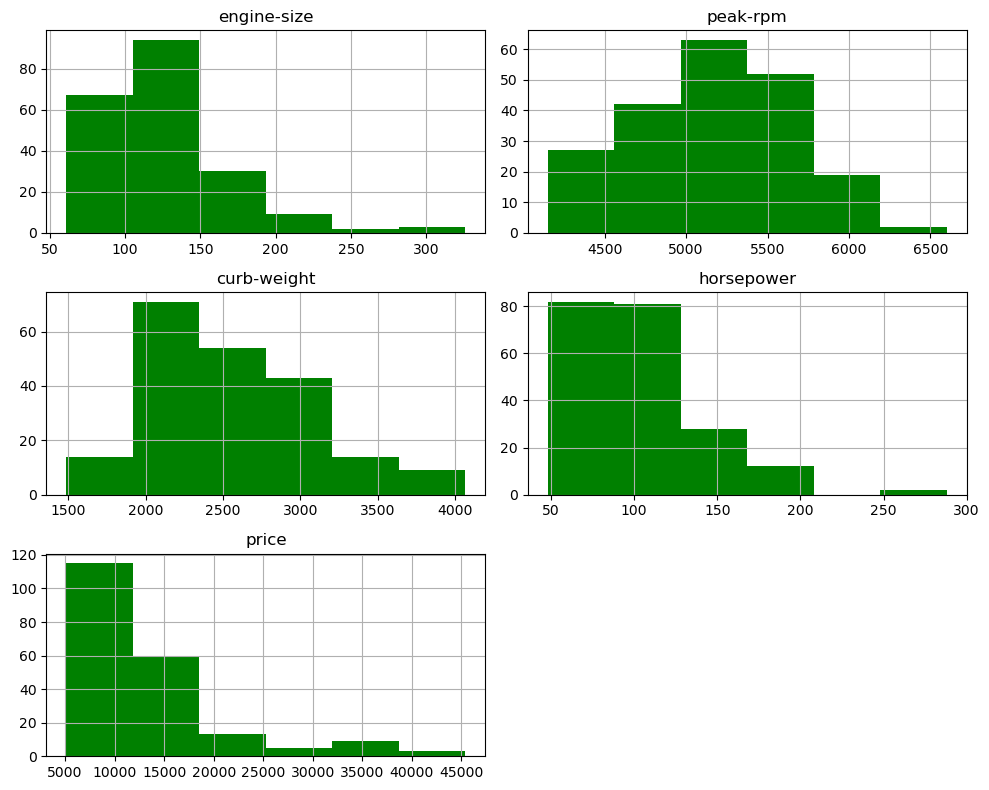

In [69]:
df[['engine-size','peak-rpm','curb-weight','horsepower','price']].hist(figsize=(10,8),bins=6,color='green')
plt.tight_layout()
plt.show()

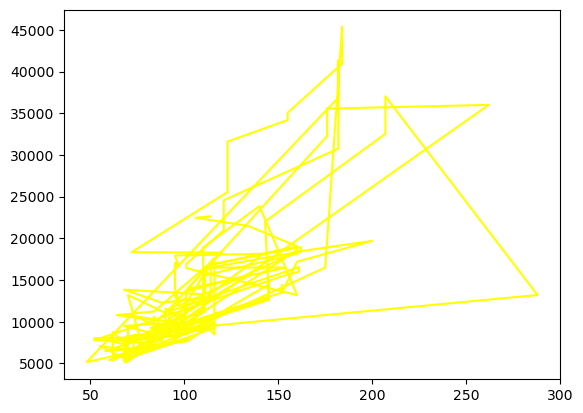

In [73]:
plt.plot(df['horsepower'],df['price'],color='yellow')

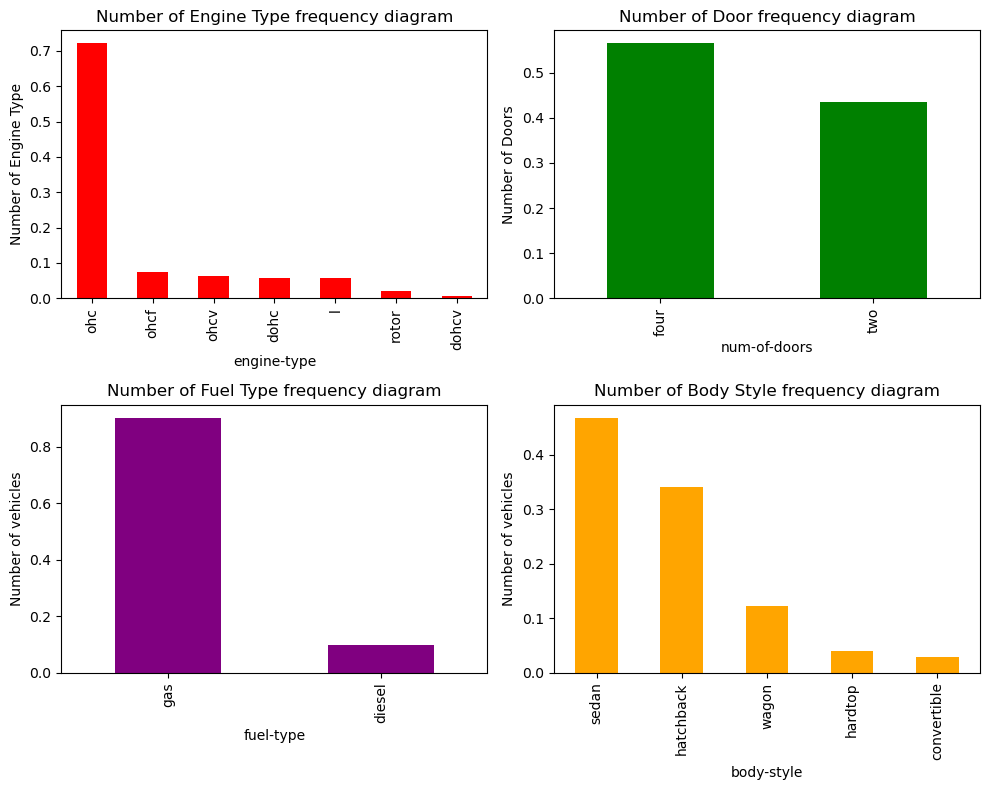

In [70]:
plt.figure(1)
plt.subplot(221)
df['engine-type'].value_counts(normalize=True).plot(figsize=(10,8),kind='bar',color='red')
plt.title("Number of Engine Type frequency diagram")
plt.ylabel('Number of Engine Type')
plt.xlabel('engine-type');


plt.subplot(222)
df['num-of-doors'].value_counts(normalize=True).plot(figsize=(10,8),kind='bar',color='green')
plt.title("Number of Door frequency diagram")
plt.ylabel('Number of Doors')
plt.xlabel('num-of-doors');

plt.subplot(223)
df['fuel-type'].value_counts(normalize= True).plot(figsize=(10,8),kind='bar',color='purple')
plt.title("Number of Fuel Type frequency diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('fuel-type');

plt.subplot(224)
df['body-style'].value_counts(normalize=True).plot(figsize=(10,8),kind='bar',color='orange')
plt.title("Number of Body Style frequency diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('body-style');
plt.tight_layout()
plt.show()


C:\Users\Madhu\AppData\Local\Temp\ipykernel_23324\309639953.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


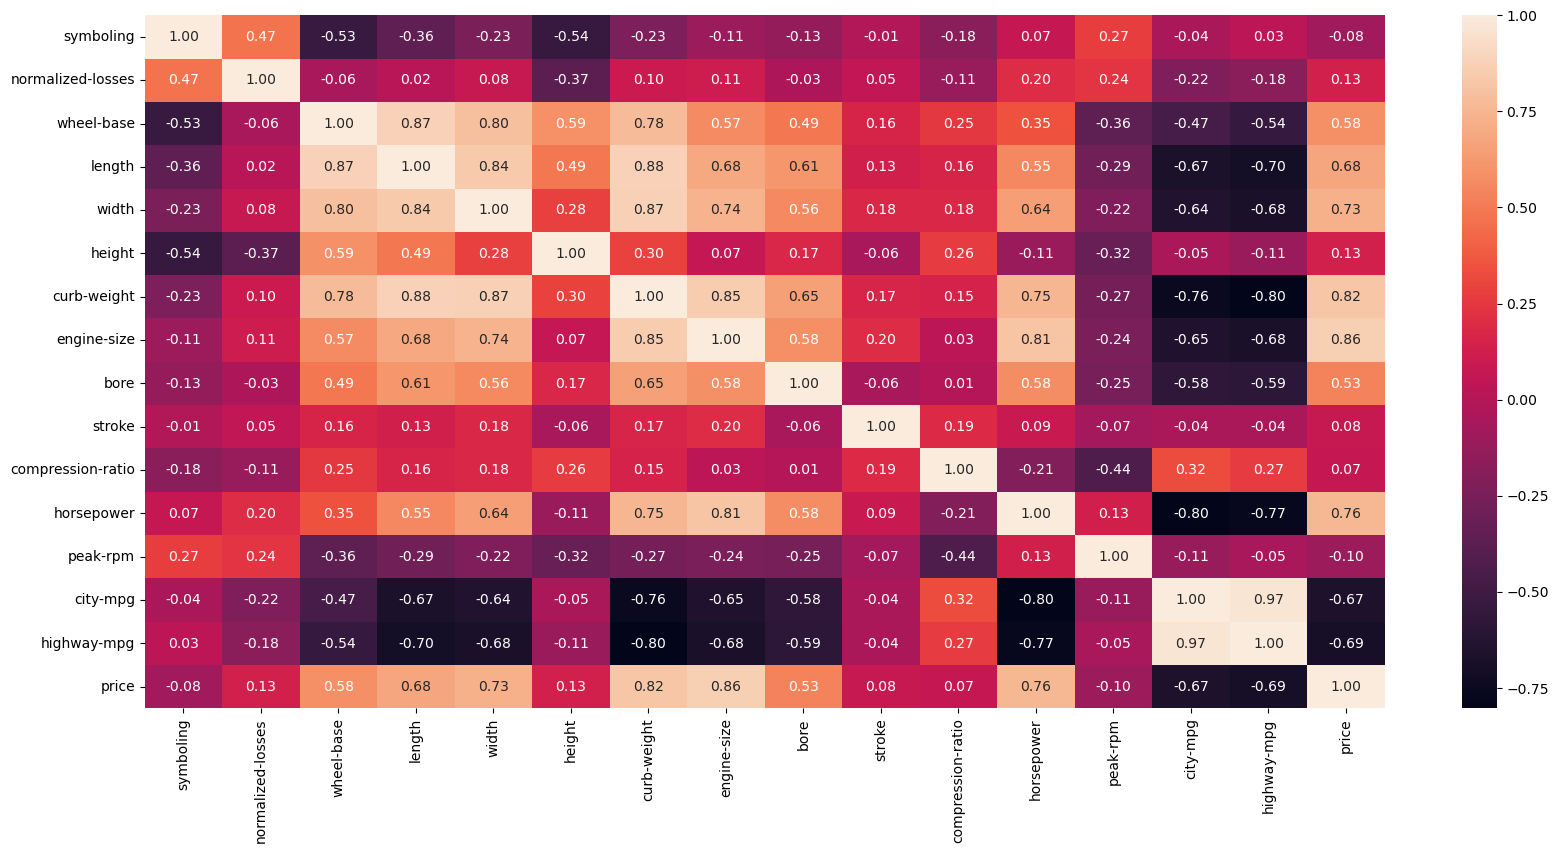

In [71]:
corr = df.corr()
plt.figure(figsize=(20,9))
a = sns.heatmap(corr, annot=True, fmt='.2f')

# Bivariate analysis

In [74]:
df.corr()

C:\Users\Madhu\AppData\Local\Temp\ipykernel_23324\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.465190,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130083,-0.008689,-0.178515,0.071380,0.273678,-0.035823,0.034606,-0.082201
normalized-losses,0.465190,1.000000,-0.056518,0.019209,0.084195,-0.370706,0.097785,0.110997,-0.029266,0.054929,-0.114525,0.203434,0.237748,-0.218749,-0.178221,0.133999
wheel-base,-0.531954,-0.056518,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488760,0.160944,0.249786,0.351985,-0.360700,-0.470414,-0.544082,0.583168
length,-0.357612,0.019209,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606462,0.129522,0.158414,0.554408,-0.287034,-0.670909,-0.704662,0.682986
width,-0.232919,0.084195,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559152,0.182939,0.181129,0.642176,-0.219861,-0.642704,-0.677218,0.728699
height,-0.541038,-0.370706,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171101,-0.055351,0.261214,-0.110114,-0.320599,-0.048640,-0.107358,0.134388
curb-weight,-0.227691,0.097785,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648485,0.168783,0.151362,0.750973,-0.266282,-0.757414,-0.797465,0.820825
engine-size,-0.105790,0.110997,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583798,0.203094,0.028971,0.810705,-0.244600,-0.653658,-0.677470,0.861752
bore,-0.130083,-0.029266,0.488760,0.606462,0.559152,0.171101,0.648485,0.583798,1.000000,-0.055909,0.005201,0.575707,-0.254765,-0.584508,-0.586992,0.532300
stroke,-0.008689,0.054929,0.160944,0.129522,0.182939,-0.055351,0.168783,0.203094,-0.055909,1.000000,0.186105,0.088133,-0.066860,-0.042179,-0.043961,0.082095


In [75]:
df.corr(method='pearson')

C:\Users\Madhu\AppData\Local\Temp\ipykernel_23324\1928163937.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson')


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.465190,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130083,-0.008689,-0.178515,0.071380,0.273678,-0.035823,0.034606,-0.082201
normalized-losses,0.465190,1.000000,-0.056518,0.019209,0.084195,-0.370706,0.097785,0.110997,-0.029266,0.054929,-0.114525,0.203434,0.237748,-0.218749,-0.178221,0.133999
wheel-base,-0.531954,-0.056518,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488760,0.160944,0.249786,0.351985,-0.360700,-0.470414,-0.544082,0.583168
length,-0.357612,0.019209,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606462,0.129522,0.158414,0.554408,-0.287034,-0.670909,-0.704662,0.682986
width,-0.232919,0.084195,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559152,0.182939,0.181129,0.642176,-0.219861,-0.642704,-0.677218,0.728699
height,-0.541038,-0.370706,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171101,-0.055351,0.261214,-0.110114,-0.320599,-0.048640,-0.107358,0.134388
curb-weight,-0.227691,0.097785,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648485,0.168783,0.151362,0.750973,-0.266282,-0.757414,-0.797465,0.820825
engine-size,-0.105790,0.110997,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583798,0.203094,0.028971,0.810705,-0.244600,-0.653658,-0.677470,0.861752
bore,-0.130083,-0.029266,0.488760,0.606462,0.559152,0.171101,0.648485,0.583798,1.000000,-0.055909,0.005201,0.575707,-0.254765,-0.584508,-0.586992,0.532300
stroke,-0.008689,0.054929,0.160944,0.129522,0.182939,-0.055351,0.168783,0.203094,-0.055909,1.000000,0.186105,0.088133,-0.066860,-0.042179,-0.043961,0.082095


In [76]:
np.cov(df['length'],df['price'])

array([[1.52208688e+02, 6.63038261e+04],
       [6.63038261e+04, 6.19175132e+07]])

In [77]:
np.array(df[['length','price']].mean())

array([  174.04926829, 13207.12682927])

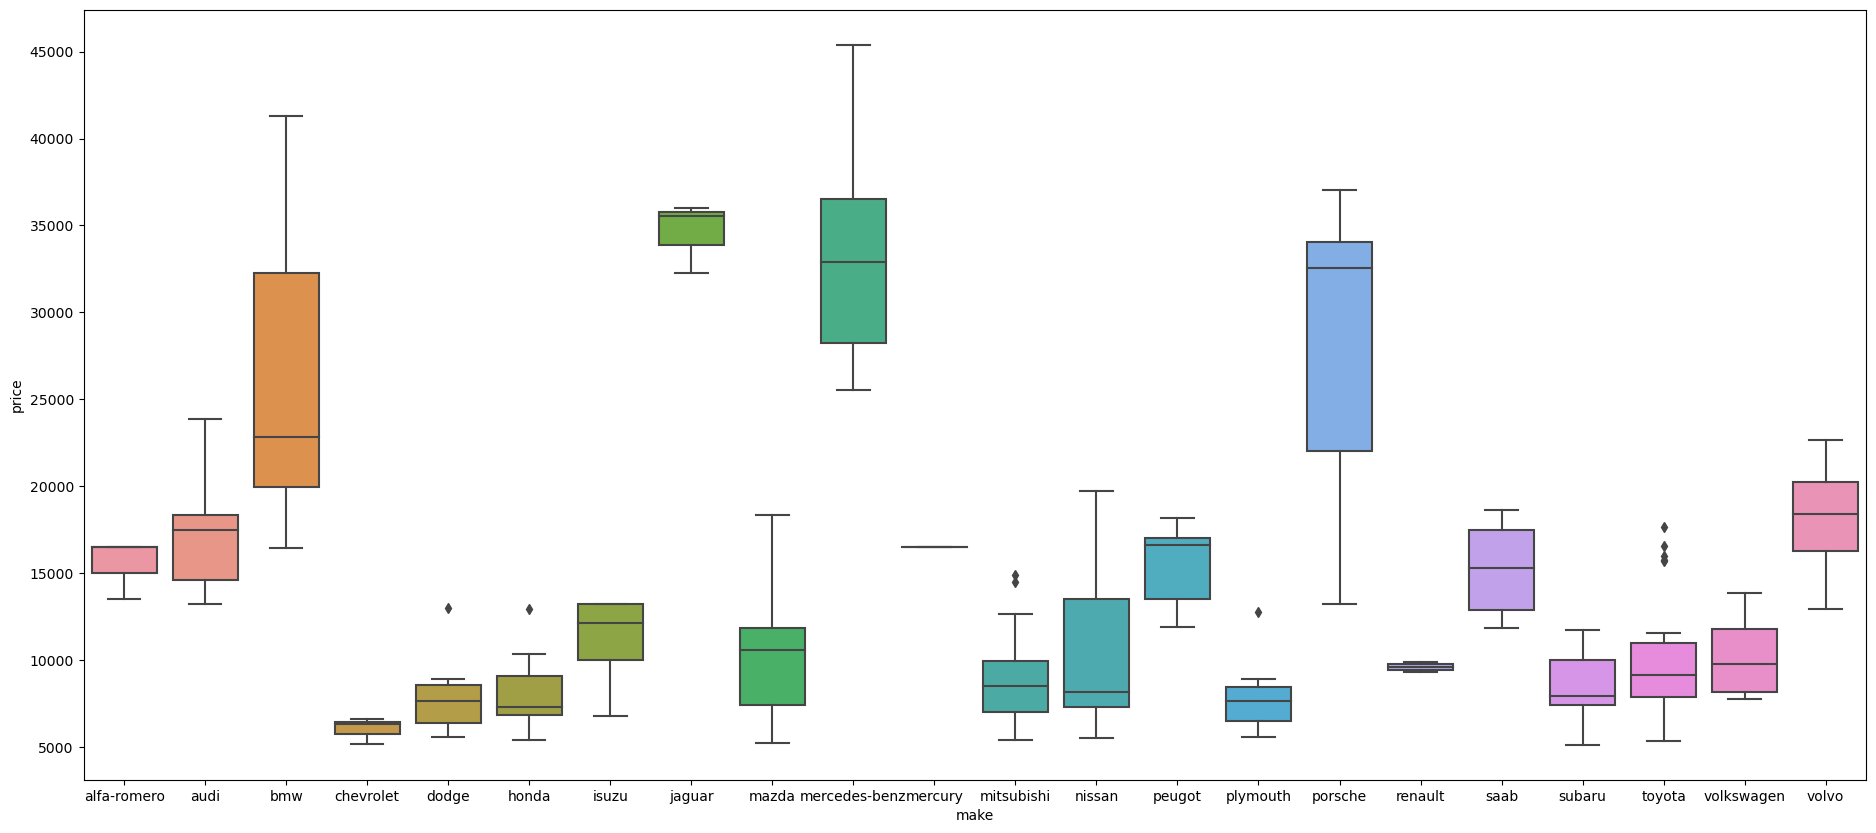

In [78]:
plt.rcParams['figure.figsize']=(23,10)
ax = sns.boxplot(x="make", y="price", data=df)

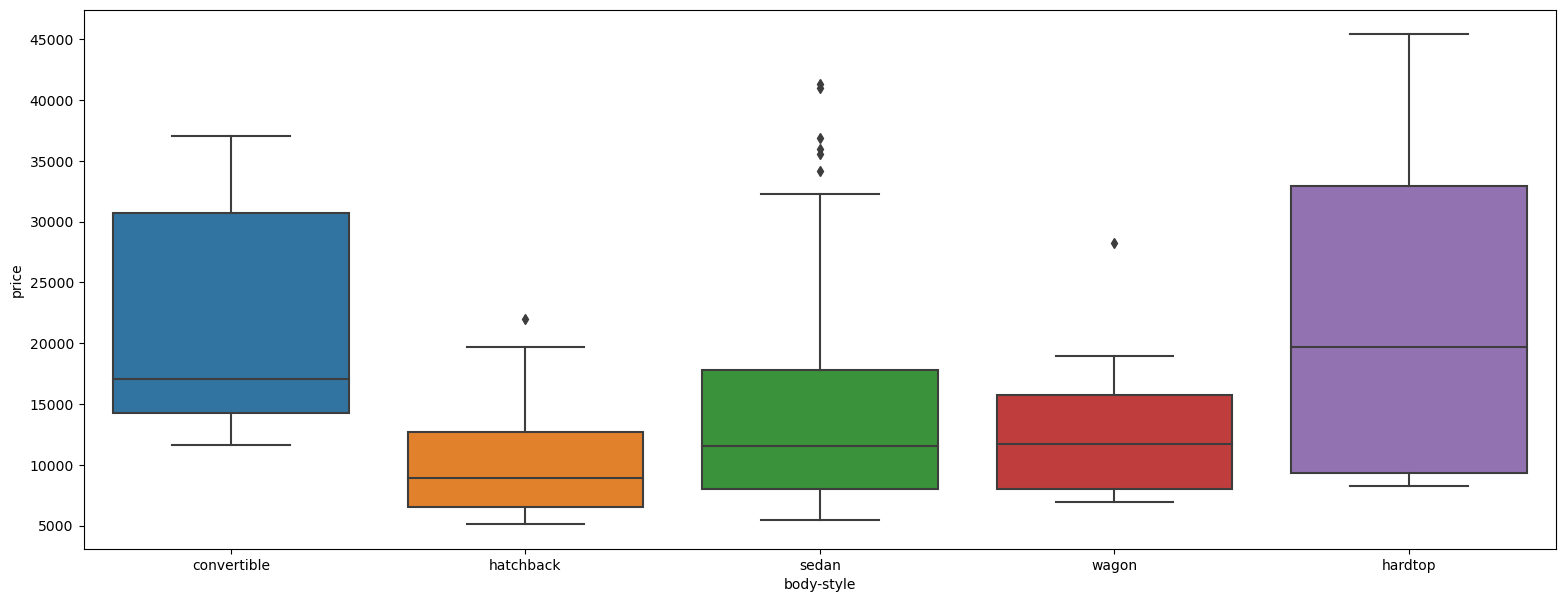

In [79]:
plt.rcParams['figure.figsize']=(19,7)
ax = sns.boxplot(x="body-style", y="price", data=df)

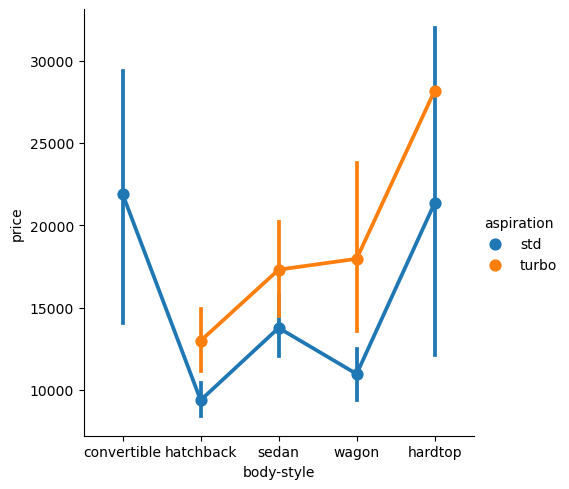

In [80]:
sns.catplot(data=df, x="body-style", y="price", hue="aspiration" ,kind="point")

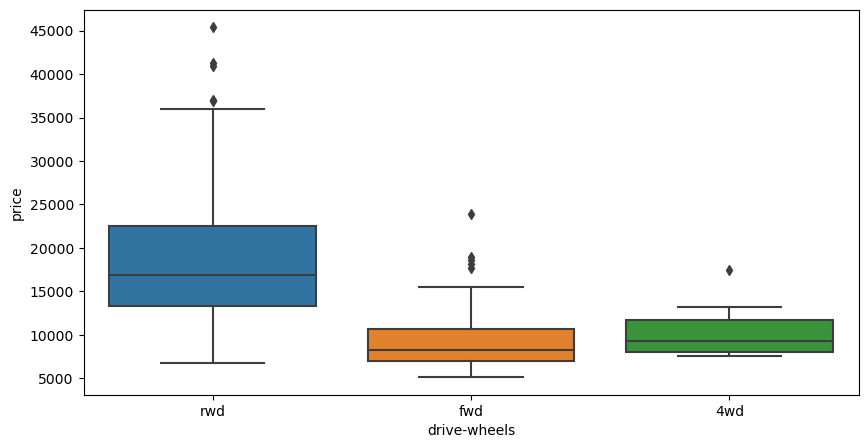

In [81]:
plt.rcParams['figure.figsize']=(10,5)
ax = sns.boxplot(x="drive-wheels", y="price", data=df)

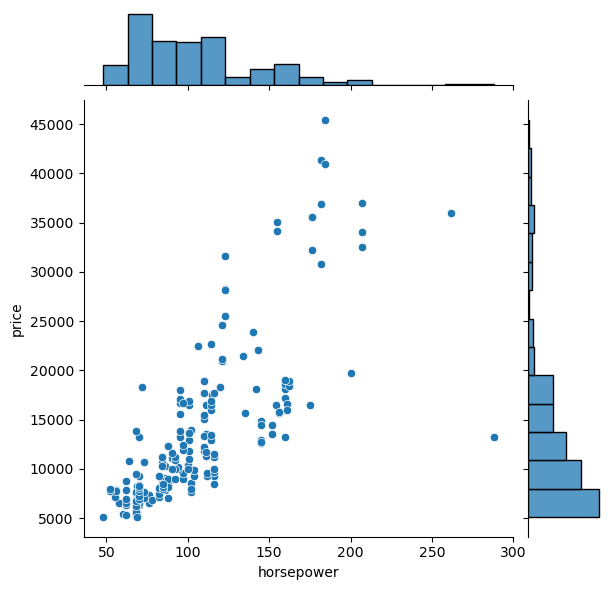

In [85]:
sns.jointplot(x='horsepower',y='price',data=df)

<Axes: xlabel='horsepower', ylabel='price'>

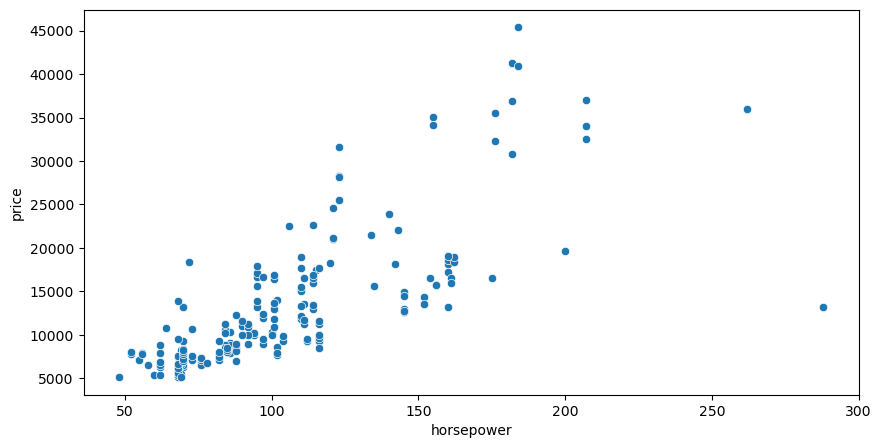

In [88]:
sns.scatterplot(x='horsepower',y='price',data=df)

# Multivariate analysis

In [89]:
np.array(df[['length','width','price']].mean())

array([  174.04926829,    65.90780488, 13207.12682927])

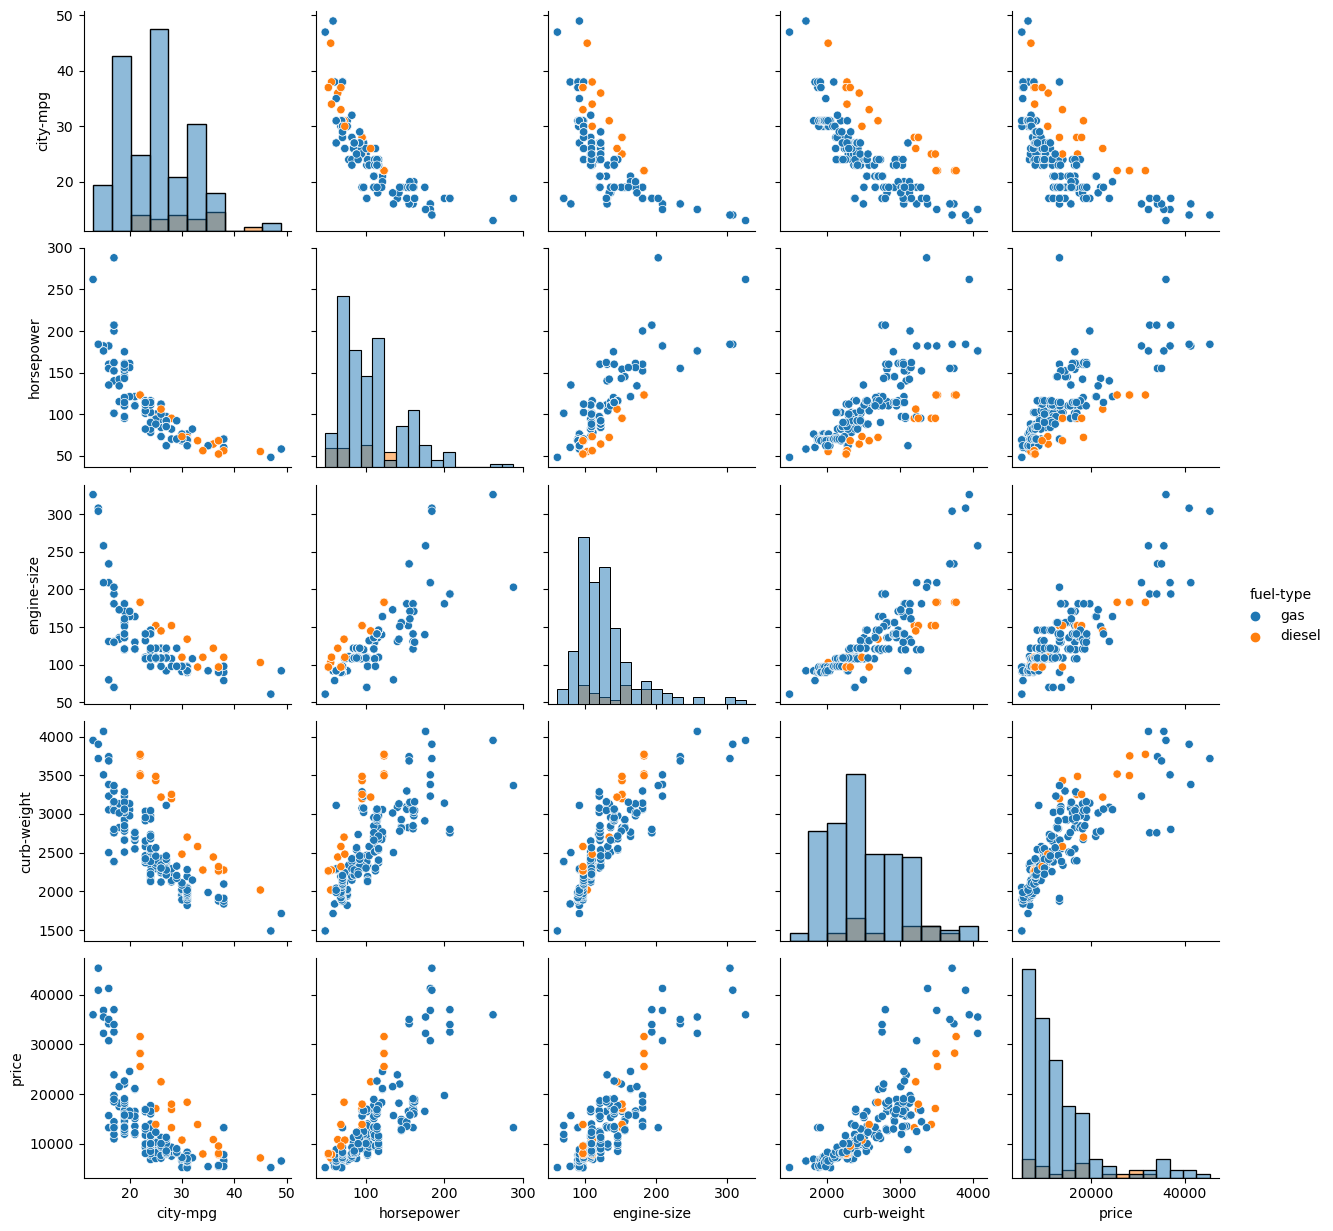

In [90]:
g = sns.pairplot(df[["city-mpg", "horsepower", "engine-size", "curb-weight","price", "fuel-type"]], hue="fuel-type", diag_kind="hist")

# Categorical Variables-Encoding

In [4]:
features=df.iloc[:,:-1]
target=df.iloc[:,-1] 

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
cat_col=features.select_dtypes("object").columns
cat_col

Index(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
       'fuel-system'],
      dtype='object')

In [11]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
features[cat_col]=oe.fit_transform(features[cat_col])

In [12]:
features.shape

(205, 25)

In [13]:
features.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,3,122,0.0,1.0,0.0,1.0,0.0,2.0,0.0,88.6,...,2.0,130,5.0,3.47,2.68,9.0,111,5000,21,27
1,3,122,0.0,1.0,0.0,1.0,0.0,2.0,0.0,88.6,...,2.0,130,5.0,3.47,2.68,9.0,111,5000,21,27
2,1,122,0.0,1.0,0.0,1.0,2.0,2.0,0.0,94.5,...,3.0,152,5.0,2.68,3.47,9.0,154,5000,19,26
3,2,164,1.0,1.0,0.0,0.0,3.0,1.0,0.0,99.8,...,2.0,109,5.0,3.19,3.40,10.0,102,5500,24,30
4,2,164,1.0,1.0,0.0,0.0,3.0,0.0,0.0,99.4,...,1.0,136,5.0,3.19,3.40,8.0,115,5500,18,22


# Scaling

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
ss=StandardScaler()
features.iloc[:,:]=ss.fit_transform(features.iloc[:,:])

In [31]:
features.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,1.743470,0.000000,-1.948256,0.328798,-0.469295,1.141653,-3.050975,1.213330,-0.121867,-1.690772,...,-0.147475,0.074449,0.869568,0.519089,-1.839404,-0.288349,0.171128,-0.263476,-0.646553,-0.546059
1,1.743470,0.000000,-1.948256,0.328798,-0.469295,1.141653,-3.050975,1.213330,-0.121867,-1.690772,...,-0.147475,0.074449,0.869568,0.519089,-1.839404,-0.288349,0.171128,-0.263476,-0.646553,-0.546059
2,0.133509,0.000000,-1.948256,0.328798,-0.469295,1.141653,-0.717207,1.213330,-0.121867,-0.708596,...,1.112210,0.604046,0.869568,-2.404862,0.685920,-0.288349,1.261870,-0.263476,-0.953012,-0.691627
3,0.938490,1.328961,-1.788499,0.328798,-0.469295,-0.875923,0.449677,-0.589081,-0.121867,0.173698,...,-0.147475,-0.431076,0.869568,-0.517248,0.462157,-0.035973,-0.057167,0.787354,-0.186865,-0.109354
4,0.938490,1.328961,-1.788499,0.328798,-0.469295,-0.875923,0.449677,-2.391492,-0.121867,0.107110,...,-1.407161,0.218885,0.869568,-0.517248,0.462157,-0.540725,0.272593,0.787354,-1.106241,-1.273900


In [34]:
features.iloc[:,9:20]

,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke
0,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,-2.865105,-0.147475,0.074449,0.869568,0.519089,-1.839404
1,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,-2.865105,-0.147475,0.074449,0.869568,0.519089,-1.839404
2,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,1.886890,1.112210,0.604046,0.869568,-2.404862,0.685920
3,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.013908,-0.147475,-0.431076,0.869568,-0.517248,0.462157
4,0.107110,0.207256,0.230001,0.235942,0.516807,-0.013908,-1.407161,0.218885,0.869568,-0.517248,0.462157
...,...,...,...,...,...,...,...,...,...,...,...
200,1.721873,1.198549,1.398245,0.728239,0.763241,-0.013908,-0.147475,0.339248,0.869568,1.666463,-0.336996
201,1.721873,1.198549,1.351515,0.728239,0.949992,-0.013908,-0.147475,0.339248,0.869568,1.666463,-0.336996
202,1.721873,1.198549,1.398245,0.728239,0.878757,1.886890,1.112210,1.109571,0.869568,0.926222,-1.232047
203,1.721873,1.198549,1.398245,0.728239,1.273437,-0.013908,1.112210,0.435538,-0.126306,-1.183465,0.462157


In [30]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    float64
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    float64
 3   fuel-type          205 non-null    float64
 4   aspiration         205 non-null    float64
 5   num-of-doors       205 non-null    float64
 6   body-style         205 non-null    float64
 7   drive-wheels       205 non-null    float64
 8   engine-location    205 non-null    float64
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    float64
 14  engine-type        205 non-null    float64
 15  num-of-cylinders   205 non-null    float64
 16  engine-size        205 non

In [18]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(features,target,test_size=0.3,random_state=2)

In [19]:
from sklearn.linear_model import LinearRegression
le=LinearRegression()
le.fit(xtrain,ytrain)
ypred=le.predict(xtest)

In [20]:
from sklearn.metrics import mean_squared_error,r2_score
print(mean_squared_error(ytest,ypred))
print(r2_score(ytest,ypred))

12502724.598113695
0.7277810765328054


In [21]:
tr=le.score(xtrain,ytrain)
te=le.score(xtest,ytest)

print(f"Training score:{tr}\nTesting score:{te}")

Training score:0.8929912376563908
Testing score:0.7277810765328054


# Building the model - Naive Bayes 

In [22]:
from sklearn.naive_bayes import GaussianNB

In [23]:
nb=GaussianNB()
nb.fit(xtrain,ytrain)

GaussianNB()

# Evaluating the model

In [24]:
nb.score(xtrain,ytrain)

0.965034965034965

In [36]:
nb.predict(ss.transform([[1.743470,0.000000,-1.948256,0.328798,-0.469295,1.141653,-3.050975,1.213330,-0.121867,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,-2.865105,-0.147475,0.074449,0.869568,0.519089,-1.839404,-0.288349,0.171128,-0.263476,-0.646553,-0.546059]]))

D:\Downloads\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
D:\Downloads\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([18150])

Text(50.722222222222214, 0.5, 'True Value')

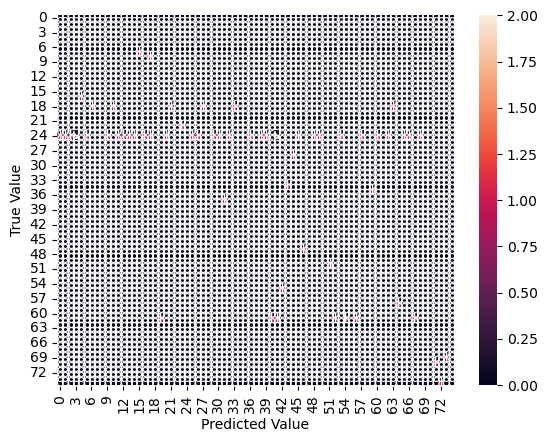

In [39]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(nb.predict(xtest),ytest),annot=True)
plt.xlabel("Predicted Value")
plt.ylabel("True Value")

# Correlation and statistical analysis

In [46]:
features.corr()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
symboling,1.000000,4.651899e-01,-0.118794,0.194311,-0.059866,0.663595,-0.596135,-0.041671,2.124709e-01,-0.531954,...,0.197762,-0.105790,0.091163,-0.130083,-0.008689,-0.178515,0.071380,0.273678,-0.035823,0.034606
normalized-losses,0.465190,1.000000e+00,-0.250975,0.101437,-0.006823,0.357192,-0.250893,0.311032,-1.293004e-17,-0.056518,...,0.166824,0.110997,0.228035,-0.029266,0.054929,-0.114525,0.203434,0.237748,-0.218749,-0.178221
make,-0.118794,-2.509755e-01,1.000000,-0.113191,0.054265,-0.151516,0.089494,-0.004317,5.460831e-02,0.078505,...,-0.039937,-0.070918,0.146624,0.251152,-0.201043,0.138828,-0.053692,-0.218347,0.053642,0.050022
fuel-type,0.194311,1.014370e-01,-0.113191,1.000000,-0.401397,0.188496,-0.147853,-0.132257,4.006951e-02,-0.308346,...,0.110617,-0.069594,0.041529,-0.054457,-0.241820,-0.984356,0.165169,0.477058,-0.255963,-0.191392
aspiration,-0.059866,-6.822700e-03,0.054265,-0.401397,1.000000,-0.052803,0.063028,0.066465,-5.719146e-02,0.257611,...,-0.133119,0.108217,0.288086,0.212623,0.222970,0.295541,0.240212,-0.183626,-0.202362,-0.254416
num-of-doors,0.663595,3.571925e-01,-0.151516,0.188496,-0.052803,1.000000,-0.685640,0.104877,1.391294e-01,-0.439635,...,0.155968,-0.013919,0.006980,-0.108510,0.006892,-0.171797,0.128176,0.240297,0.014271,0.037452
body-style,-0.596135,-2.508926e-01,0.089494,-0.147853,0.063028,-0.685640,1.000000,-0.155745,-2.770093e-01,0.401362,...,-0.048408,-0.073352,-0.065079,0.010562,-0.015344,0.136243,-0.152467,-0.109414,0.031697,-0.007170
drive-wheels,-0.041671,3.110317e-01,-0.004317,-0.132257,0.066465,0.104877,-0.155745,1.000000,1.478645e-01,0.459745,...,0.223238,0.524307,0.424686,0.481805,0.071623,0.127479,0.516973,-0.039719,-0.449581,-0.452220
engine-location,0.212471,-1.293004e-17,0.054608,0.040070,-0.057191,0.139129,-0.277009,0.147865,1.000000e+00,-0.187790,...,0.135541,0.196826,0.105971,0.185044,-0.138459,-0.019762,0.317618,0.198401,-0.153487,-0.102026
wheel-base,-0.531954,-5.651842e-02,0.078505,-0.308346,0.257611,-0.439635,0.401362,0.459745,-1.877902e-01,1.000000,...,-0.184596,0.569329,0.384601,0.488760,0.160944,0.249786,0.351985,-0.360700,-0.470414,-0.544082


In [45]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.253659,5125.365854,25.219512,30.751220,13207.126829
std,1.245307,31.681008,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.519219,476.979095,6.542142,6.886443,7868.768212
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10595.000000
75%,2.000000,137.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000
